In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf
import keras 

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist #Import the mnist dataset from keras

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load data into train & test data

In [5]:
len(x_train), len(x_test) #Know how big the training data is

(60000, 10000)

這個數字是: 9


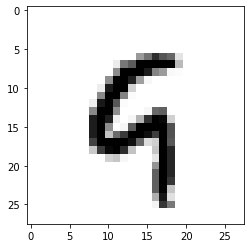

In [6]:
x = 37688
img = x_train[x]
plt.imshow(img, cmap = 'Greys') #For example
print("這個數字是:", y_train[x])

In [7]:
x_train = x_train/255
x_test = x_test/255  #把array裡的數字調整至[0, 1]

In [8]:
from keras.utils import np_utils

In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10) #Do One-hot encoding to the training data

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD #import packages(?) for the neural network

In [11]:
model = Sequential()

In [12]:
model.add(Flatten(input_shape = (28,28)))

In [13]:
model.add(Dense(392, activation = 'relu')) #Layer 1

In [14]:
model.add(Dense(200, activation = 'relu')) #Layer 2

In [15]:
model.add(Dense(30, activation = 'relu')) #Layer 3

In [16]:
model.add(Dense(10, activation = 'relu')) #Layer 4

In [17]:
model.add(Dense(10, activation = 'softmax'))

In [18]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.05), metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               78600     
_________________________________________________________________
dense_3 (Dense)              (None, 30)                6030      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 392,770
Trainable params: 392,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train, y_train, batch_size = 100, epochs = 20)



Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0888 - acc: 0.2353
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0842 - acc: 0.3997
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0718 - acc: 0.4868
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0555 - acc: 0.6246
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0431 - acc: 0.7155
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0367 - acc: 0.7519
Epoch 7/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0328 - acc: 0.7731
Epoch 8/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0261 - acc: 0.8379
Epoch 9/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0210 - acc: 0.8709
Epoch 10/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0186 - acc: 0.88

In [21]:
predict = model.predict_classes(x_test)
predict[1234]

8

In [22]:
predict_prob = model.predict(x_test)
predict_prob[1234]

array([1.9477235e-01, 2.9789979e-04, 9.0632532e-03, 3.7085619e-02,
       2.4669357e-06, 3.2536536e-01, 1.3835657e-03, 9.7235962e-04,
       4.3047997e-01, 5.7722954e-04], dtype=float32)

In [23]:
def show(num):
    plt.imshow(x_test[num], cmap = 'Greys')
    print("神經網路判斷為:", predict[num])

In [24]:
from ipywidgets import interact_manual

In [25]:
interact_manual(show, num = (0, 9999))

interactive(children=(IntSlider(value=4999, description='num', max=9999), Button(description='Run Interact', s…

<function __main__.show(num)>

神經網路判斷為: 4


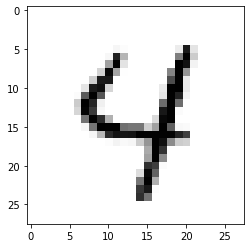

In [26]:
show(1222)

In [27]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 63us/step


In [28]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.010355128962657181
正確率 0.9343


In [29]:
model_json = model.to_json() #轉成json格式
open('test_model.json', 'w').write(model_json) #建立新檔，寫入這個model
model.save_weights('test_model_weights.h5') #把參數存起來